<a id="top"></a>

# <center>Python [Pandas](http://pandas.pydata.org/pandas-docs/stable/) Cheat Sheet</center>

As a data analyst, these are common tasks I perform using Pandas

- [Pandas display output options](#options)
- [Sorting More Than One Columns](#sorting)
- [Removing duplicates](#removing_duplicates)
- [Creating a column based on values from another column](#map)
- [Removing a column](#remove_column)
- [Replacing values in a series](#replacing_values)
- [Reading CSV or Excel files](http://pandas.pydata.org/pandas-docs/stable/io.html)
- [Renaming axis](#renaming_axis)
- [Renaming indexes or columns](#renaming_indexes_columns)
- [Binning data into intervals](#binning)
- [Grouping data](#group)
- [Sub-selecting or Slicing a DataFrame](#slicing)
- [Boolean indexing](#boolean)
- [Obtaining columns with partial column labels](#partial_column_labels)
- [Getting value counts](#value_counts)
- [Getting cumulative sum](#cum_sum)
- [Pivot table](#pivot_table)
- [Pivot table Percent of Rows](#perc_rows)
- [Pivot table Percent of Columns](#perc_columns)
- [Transpose a dataframe](#transpose)
- [Converting index to a column](#index2column)
- [How to add or fill in missing dates](#missing_dates)
- [How to connect to an ODBC data source (Windows)](#database)
- [How to convert data in wide format to long format using melt()](#melt)
- [How to convert data in long format data to wide format using pivot()](#pivot)
- [Using category data type to control sort order](#category)
- [Merging 2 dataframes using merge()](#merge)
- [Finding rows containing data with missing values](#missing)
- [Converting a data type of a column in a dataframe](#convert_type)
- [Sending Pandas dataframe to R using rpy2 IPython notebook extension](#rpy2)
- [BONUS: A HUGE list of python and pandas snippets by Chris Albon](http://chrisalbon.com/)

<a id='options'></a>

### Setting display output [options](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html)

[[back to top](#top)]

In [70]:
import pandas as pd
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",20)
pd.set_option('precision',7)
pd.set_option('large_repr', 'truncate')

<a id='sorting'></a>

### Sorting More Than One Column

[[back to top]](#top)

In [8]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


**Just pass a list of columns you want to sort and pass corresponding list of True/False to the ascending parameter**

In [11]:
data.sort(columns=['group','ounces'], ascending=[False, True], inplace=True)
data

,group,ounces
6,c,3.0
7,c,5.0
8,c,6.0
3,b,6.0
4,b,7.5
5,b,8.0
1,a,3.0
0,a,4.0
2,a,12.0


<a id='removing_duplicates'></a>

### Removing duplicates

[[back to top](#top)]

In [7]:
import pandas as pd
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4, 'k2': [3, 2, 1, 3, 3, 4, 4]})

In [8]:
data.sort(columns='k2')
data

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
4,two,3
5,two,4
6,two,4


In [9]:
data.drop_duplicates()  # by default, duplicate is defined by all columns

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
5,two,4


### Define duplicates by column name(s):

In [10]:
data.drop_duplicates(subset='k1')  # duplicate in column k1 only

,k1,k2
0,one,3
3,two,3


<a id="map"></a>

### Creating a new column based on values from another column

[[back to top](#top)]

In [18]:
import pandas as pd
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami','corned beef', 'Bacon', 'pastrami', 'honey ham','nova lox'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


### Suppose you wanted to add a column indicating the type of animal that each food came from. Let’s write down a mapping of each distinct meat type to the kind of animal using a dictionary and a function:

In [19]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

def meat2animal(series):
    if series["food"]=='bacon':
        return 'pig'
    elif series["food"]=='pulled pork':
        return 'pig'
    elif series["food"]=='pastrami':
        return 'cow'
    elif series["food"]=='corned beef':
        return 'cow'
    elif series["food"]=='honey ham':
        return 'pig'
    else:
        return 'salmon'

In [20]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


#### Or we could use apply() and apply the meat2animal() function to the new column:

In [21]:
data['animal2'] = data.apply(meat2animal,axis=1)  # axis=1 means to apply the function down the column, not across the row
data

,food,ounces,animal,animal2
0,bacon,4.0,pig,pig
1,pulled pork,3.0,pig,pig
2,bacon,12.0,pig,pig
3,Pastrami,6.0,cow,salmon
4,corned beef,7.5,cow,cow
5,Bacon,8.0,pig,salmon
6,pastrami,3.0,cow,cow
7,honey ham,5.0,pig,pig
8,nova lox,6.0,salmon,salmon


<a id='remove_column'></a>

### Removing or dropping a column

[[back top top](#top)]

In [23]:
data.drop('animal2', axis=1, inplace=True)  # dropping/removing a column
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


<a id="replacing_values"></a>

### Replacing Values in a Series

[[back to top](#top)]

In [30]:
import pandas as pd
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64

#### If you want to replace -999 with NaN:

In [32]:
data.replace(-999, np.nan, inplace=True)
data

0       1
1     NaN
2       2
3     NaN
4   -1000
5       3
dtype: float64

#### If you want to replace multiple values at once, you instead pass a list then the substitute value:

In [35]:
import pandas as pd
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64

In [37]:
data.replace([-999, -1000], np.nan, inplace=True)
data

0     1
1   NaN
2     2
3   NaN
4   NaN
5     3
dtype: float64

<a name="renaming_axis"></a>
<br>
<br>

### Renaming Axis Indexes

[[back to top](#top)]

In [47]:
import pandas as pd
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [48]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [51]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


#### If you want to create a transformed version of a data set without modifying the original, a useful method is rename:

In [65]:
data.rename(index=str.title, columns=str.upper, inplace=True)  # str.title means to make the 1st letter capitalized only
data

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


<a id="renaming_indexes_columns"></a>

### Renaming Indexes or Columns

[[back to top](#top)]

#### <i>rename()</i> can be used in conjunction with a dict-like object providing new values for a subset of the axis labels:

In [46]:
import pandas as pd
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=['Ohio', 'Colorado', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [47]:
data.rename(index={'Ohio': 'INDIANA'},columns={'three': 'peekaboo'},inplace=True)
data

,one,two,peekaboo,four
INDIANA,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


You can also apply str functions to modify the index or column labels

In [48]:
data.rename(index=str.title, columns=str.upper, inplace=True)  # str.title means to make the 1st letter capitalized only
data

,ONE,TWO,PEEKABOO,FOUR
Indiana,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


<a id="binning"></a>

### Binning Data Into Intervals

[[back to top](#top)]

In [71]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

#### Let’s divide these into bins of 18 to 25, 26 to 35, 35 to 60, and finally 60 and older. To do so, you have to use <i>cut()</i>, a function in pandas:

In [73]:
bins = [18, 25, 35, 60, 100]

In [75]:
cats = pd.cut(ages, bins)
cats

  (18, 25]
  (18, 25]
  (18, 25]
  (25, 35]
  (18, 25]
  (18, 25]
  (35, 60]
  (25, 35]
 (60, 100]
  (35, 60]
  (35, 60]
  (25, 35]
Levels (4): Index(['(18, 25]', '(25, 35]', '(35, 60]', '(60, 100]'], dtype=object)

In [77]:
cats.labels

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int32)

In [78]:
cats.levels

Index(['(18, 25]', '(25, 35]', '(35, 60]', '(60, 100]'], dtype='object')

In [79]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

#### If you want the right value to be exclusive in the intervals:

In [80]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

  [18, 26)
  [18, 26)
  [18, 26)
  [26, 36)
  [18, 26)
  [18, 26)
  [36, 61)
  [26, 36)
 [61, 100)
  [36, 61)
  [36, 61)
  [26, 36)
Levels (4): Index(['[18, 26)', '[26, 36)', '[36, 61)', '[61, 100)'], dtype=object)

#### You can also pass your own bin names by passing a list or array to the labels option:

In [83]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)
pd.value_counts(pd.cut(ages, bins, labels=group_names))

Youth         5
YoungAdult    3
MiddleAged    3
Senior        1
dtype: int64

[[back to top](#top)]

<a id="group"></a>

## Grouping Data

[[back to top](#top)]

In [1]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,-1.206295,0.277025,a,one
1,-0.210670,1.700554,a,two
2,1.090656,0.141390,b,one
3,-0.755093,1.402054,b,two
4,0.251278,0.767201,a,one


In [3]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a      -0.388562
b       0.167782
dtype: float64

<a id='slicing'></a>

## Sub-selecting or Slicing a DataFrame

[[back to top](#top)]

Filtering by label name: [[loc](#loc)]<br>
Filtering by index row and/or column: [[iloc](#iloc)]

<a id='df'></a>

In [1]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.495158,2.136794,0.034707,-0.128909
2013-01-02,0.562039,-1.150613,0.265513,0.093981
2013-01-03,0.973170,0.877070,0.682884,-0.026271
2013-01-04,-1.146283,1.350325,-0.040049,1.069154
2013-01-05,0.919800,-0.058590,0.083294,0.156124
2013-01-06,1.286808,-0.357197,-0.205763,-0.316696


### Getting first n rows of dataframe using index slicing syntax

In [2]:
df[0:3]  # get first 3 rows of the dataframe

,A,B,C,D
2013-01-01,1.495158,2.136794,0.034707,-0.128909
2013-01-02,0.562039,-1.150613,0.265513,0.093981
2013-01-03,0.973170,0.877070,0.682884,-0.026271


### Slicing based on dataframe's index range

In [3]:
df['20130102':'20130104'] # get rows by index range

,A,B,C,D
2013-01-02,0.562039,-1.150613,0.265513,0.093981
2013-01-03,0.973170,0.877070,0.682884,-0.026271
2013-01-04,-1.146283,1.350325,-0.040049,1.069154


<a id='loc'></a>

### Slicing based on column labels/names using loc

[[view df](#slicing)]

In [4]:
df.loc[:,['A','B']]  # syntax is: df.loc[rows_index, cols_index]

,A,B
2013-01-01,1.495158,2.136794
2013-01-02,0.562039,-1.150613
2013-01-03,0.973170,0.877070
2013-01-04,-1.146283,1.350325
2013-01-05,0.919800,-0.058590
2013-01-06,1.286808,-0.357197


### Slicing based on row index label and column label combined using loc

In [5]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.562039,-1.150613
2013-01-03,0.973170,0.877070
2013-01-04,-1.146283,1.350325


<a id='iloc'></a>

### Slicing based on index position of the row or column using iloc

[[view df](#slicing)]

In [6]:
df.iloc[3]  # returns 4th row (index=3) of the dataframe

A   -1.146283
B    1.350325
C   -0.040049
D    1.069154
Name: 2013-01-04 00:00:00, dtype: float64

In [7]:
df.iloc[3:5,0:2]  # returns specific range of rows and columns of the dataframe

,A,B
2013-01-04,-1.146283,1.350325
2013-01-05,0.919800,-0.058590


In [9]:
df.iloc[[1,5],[0,2]] # returns specific rows and columns using lists containing columns or row indexes

,A,C
2013-01-02,0.562039,0.265513
2013-01-06,1.286808,-0.205763


In [10]:
df.iloc[1:3,:]  # returning specific rows and returning all columns

,A,B,C,D
2013-01-02,0.562039,-1.150613,0.265513,0.093981
2013-01-03,0.973170,0.877070,0.682884,-0.026271


In [11]:
df.iloc[:,1:3]  # returning all rows and specific columns

,B,C
2013-01-01,2.136794,0.034707
2013-01-02,-1.150613,0.265513
2013-01-03,0.877070,0.682884
2013-01-04,1.350325,-0.040049
2013-01-05,-0.058590,0.083294
2013-01-06,-0.357197,-0.205763


In [12]:
df.iloc[1,1]  # getting secific scalar/single value

-1.1506133975623973

<a id='boolean'></a>

## [Boolean Indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing)

[[view df](#df)]

The boolean operators are: **|** for or, <strong>&</strong> for and, and **~** for not. These **must** be grouped by using parentheses.

In [33]:
df[df.A > -0.5]  # or df[df["A"] > -0.5], this syntax works when there is a space in the column name

,A,B,C,D
2013-01-03,2.351035,0.085318,-2.265766,0.432268
2013-01-04,0.447390,0.205224,-0.614702,0.212125
2013-01-05,-0.455682,-2.765288,0.475253,0.432910
2013-01-06,1.000494,-0.462591,-0.638053,0.481087


or I've seen some people do boolean filtering by passing "criteria" variable to the dataframe like so:

In [34]:
criteria = df.A > -0.5
df[criteria]

,A,B,C,D
2013-01-03,2.351035,0.085318,-2.265766,0.432268
2013-01-04,0.447390,0.205224,-0.614702,0.212125
2013-01-05,-0.455682,-2.765288,0.475253,0.432910
2013-01-06,1.000494,-0.462591,-0.638053,0.481087


In [35]:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.564503,-1.195000,0.441140,-0.291384,one
2013-01-02,-0.893038,-0.372430,-0.436048,-0.545141,one
2013-01-03,2.351035,0.085318,-2.265766,0.432268,two
2013-01-04,0.447390,0.205224,-0.614702,0.212125,three
2013-01-05,-0.455682,-2.765288,0.475253,0.432910,four
2013-01-06,1.000494,-0.462591,-0.638053,0.481087,three


In [36]:
df2[df2['E'].isin(['two','four'])]  # read as "return rows where column E contains two or four"

,A,B,C,D,E
2013-01-03,2.351035,0.085318,-2.265766,0.432268,two
2013-01-05,-0.455682,-2.765288,0.475253,0.432910,four


#### Using ~ to do a "NOT"

In [38]:
df2[~df2['E'].isin(['two','four'])]  # column E containing values not in two or four

,A,B,C,D,E
2013-01-01,-0.564503,-1.195000,0.441140,-0.291384,one
2013-01-02,-0.893038,-0.372430,-0.436048,-0.545141,one
2013-01-04,0.447390,0.205224,-0.614702,0.212125,three
2013-01-06,1.000494,-0.462591,-0.638053,0.481087,three


#### Filtering using query() method

In [52]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.683630,-0.961407,1.052018,0.512382
2013-01-02,-0.755844,1.672273,0.365384,1.030149
2013-01-03,-0.532466,0.616725,1.066731,-1.056756
2013-01-04,0.153878,-1.270198,0.346587,0.150570
2013-01-05,1.645820,0.817894,0.168950,-0.833291
2013-01-06,-0.768034,1.145290,-0.612168,0.325120


In [58]:
df.query('A > C')

,A,B,C,D
2013-01-05,1.64582,0.817894,0.16895,-0.833291


In [69]:
df.query('A > 0')

,A,B,C,D
2013-01-04,0.153878,-1.270198,0.346587,0.150570
2013-01-05,1.645820,0.817894,0.168950,-0.833291


In [68]:
df.query('A > 0 & A < 1')

,A,B,C,D
2013-01-04,0.153878,-1.270198,0.346587,0.15057


In [65]:
df.query('A > B | A > C')  # where A is greater than B or A is greater than C

,A,B,C,D
2013-01-01,-0.683630,-0.961407,1.052018,0.512382
2013-01-04,0.153878,-1.270198,0.346587,0.150570
2013-01-05,1.645820,0.817894,0.168950,-0.833291


<a id='partial_column_labels'></a>

## Obtaining columns with partial column labels

[[back to top](#top)]

In [40]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,0.740132,1.220225,a,one
1,1.223369,0.830145,a,two
2,-2.046775,-1.149754,b,one
3,-3.068403,0.675124,b,two
4,-0.467039,0.640412,a,one


In [42]:
df.filter(like='data')

,data1,data2
0,0.740132,1.220225
1,1.223369,0.830145
2,-2.046775,-1.149754
3,-3.068403,0.675124
4,-0.467039,0.640412


<a id='value_counts'></a>

## Getting Value Counts

It is so tempting to use the groupby() function or pivot_table, but most of the time, value_count() function is all we need.

[[back to top](#top)]

In [1]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [2]:
data.group.value_counts()

a    3
b    3
c    3
dtype: int64

<a id='cum_sum'></a>

## Getting Cumulative Sum

[[back to top](#top)]

In [3]:
data.group.value_counts().cumsum()

a    3
b    6
c    9
dtype: int64

<a id='pivot_table'></a>

## Pivot table example - see also this excellent [article](http://pbpython.com/pandas-pivot-table-explained.html) on pivot tables

[[back to top](#top)]

In [51]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


#### Calculating the means of each group

In [3]:
data.pivot_table(values='ounces',index='group',aggfunc=np.mean)

group
a        6.333333
b        7.166667
c        4.666667
Name: ounces, dtype: float64

#### Getting counts by group

In [5]:
data.pivot_table(values='ounces',index='group',aggfunc='count')

group
a        3
b        3
c        3
Name: ounces, dtype: int64

#### Getting cumulative sum or running total of the group counts

In [6]:
data.pivot_table(values='ounces',index='group',aggfunc='count').cumsum()

group
a        3
b        6
c        9
Name: ounces, dtype: int64

In [22]:
import pandas as pd

# sample data can be dowloaded here: http://pbpython.com/extras/sales-funnel.xlsx
df = pd.read_csv('/home/pybokeh/Downloads/sales-funnel.csv')

In [5]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [12]:
by_rep = pd.pivot_table(data=df, index='Rep', columns='Product', values='Quantity', aggfunc='count', fill_value=0)
by_rep

Product,CPU,Maintenance,Monitor,Software
Rep,,,,
Cedric Moss,2,1,0,1
Craig Booker,2,1,0,1
Daniel Hilton,2,0,0,1
John Smith,1,1,0,0
Wendy Yule,2,1,1,0


<a id='perc_rows'></a>

#### Percent of rows

[[back to top](#top)]

In [15]:
perc_of_rows = by_rep.apply(lambda x : x / x.sum() * 100, axis=1) 
perc_of_rows

Product,CPU,Maintenance,Monitor,Software
Rep,,,,
Cedric Moss,50.000000,25,0,25.000000
Craig Booker,50.000000,25,0,25.000000
Daniel Hilton,66.666667,0,0,33.333333
John Smith,50.000000,50,0,0.000000
Wendy Yule,50.000000,25,25,0.000000


<a id='perc_columns'></a>

#### Percent of columns

[[back to top](#top)]

In [16]:
perc_of_columns = by_rep.apply(lambda x : x / x.sum() * 100, axis=0) 
perc_of_columns

Product,CPU,Maintenance,Monitor,Software
Rep,,,,
Cedric Moss,22.222222,25,0,33.333333
Craig Booker,22.222222,25,0,33.333333
Daniel Hilton,22.222222,0,0,33.333333
John Smith,11.111111,25,0,0.000000
Wendy Yule,22.222222,25,100,0.000000


<a id='index2column'></a>

<a id='transpose'></a>

## Transpose a dataframe

[[back to top](#top)]

Let's say you have a dataframe with several columns and having a hard time scrolling to see them.  Transpose it!

In [2]:
import pandas as pd

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,-0.548420,0.381045,a,one
1,-0.327573,0.273854,a,two
2,-1.356345,-0.045686,b,one
3,-0.476385,1.075987,b,two
4,-0.923575,-0.973773,a,one


In [3]:
df.head(1).transpose()

,0
data1,-0.5484204
data2,0.3810447
key1,a
key2,one


You can also do df.dtypes to accomplish similar output, but it's nice to see actual data along with the columns.

In [4]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

## Converting a dataframe index to a column

[[back to top](#top)]

In [49]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [50]:
data.reset_index(level=0, inplace=True)
data

,index,group,ounces
0,0,a,4.0
1,1,a,3.0
2,2,a,12.0
3,3,b,6.0
4,4,b,7.5
5,5,b,8.0
6,6,c,3.0
7,7,c,5.0
8,8,c,6.0


<a id='missing_dates'></a>

## How to add or fill in missing dates

[[back to top]](#top)

In [61]:
import pandas as pd

idx = pd.date_range('09-01-2013', '09-30-2013')

s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})
s

09-02-2013     2
09-03-2013    10
09-06-2013     5
09-07-2013     1
dtype: int64

#### From above, we have holes in our data.  Let's fill in those missing holes using the idx date_range we specified above.

In [63]:
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
s

2013-09-01     0
2013-09-02     2
2013-09-03    10
2013-09-04     0
2013-09-05     0
2013-09-06     5
2013-09-07     1
2013-09-08     0
2013-09-09     0
2013-09-10     0
2013-09-11     0
2013-09-12     0
2013-09-13     0
2013-09-14     0
2013-09-15     0
2013-09-16     0
2013-09-17     0
2013-09-18     0
2013-09-19     0
2013-09-20     0
2013-09-21     0
2013-09-22     0
2013-09-23     0
2013-09-24     0
2013-09-25     0
2013-09-26     0
2013-09-27     0
2013-09-28     0
2013-09-29     0
2013-09-30     0
Freq: D, dtype: int64

<a id='database'></a>

## How to connect and query against a database registered as an ODBC data source (Windows)

[[back to top]](#top)

In [ ]:
import pyodbc                  # If using PostgreSQL, MySQL, SQLite, Redshift, MS SQL Server, or Oracle, use db.py instead
import pandas as pd
from getpass import getpass    # Module that will create a text input widget AND mask your password

userid = 'your_userid'
pw = getpass(prompt='Enter your password: ')

cnxn_string = 'DSN=your_dsn;UID=' + userid + ';PWD=' + pw

cnxn = pyodbc.connect(cnxn_string)
cursor = cnxn.cursor()

sql = """
SELECT * from your_table...
"""

df = pd.read_sql(sql, cnxn, index_col=None, parse_dates={'some_column':"%Y-%m-%d"})

# Close connections
cursor.close()
cnxn.close()

### Also check out Yhat's [db.py](https://github.com/yhat/db.py).  Currently, doesn't support IBM DB2.  So I'm stuck with pyodbc for now.

<a id='melt'></a>

## How to convert data in wide format to long format using pd.melt()

[[back to top](#top)]

When using ggplot to plot data where you have multiple data sets you want to plot, you need to convert data in wide format to long format.

In [14]:
import pandas.io.data as web
from datetime import datetime
import pandas as pd

stocks = {'tech':['GOOGL', 'MSFT', 'LNKD', 'YHOO', 'FB','HPQ','AMZN'],
          'auto':['TM','F','GM','HMC','NSANY','HYMTF'],
          'housing':['HD','WMT','LOW']
          }

start_date = datetime(2014,1,1)
end_date = datetime(2014, 11, 30)

def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']

df = pd.DataFrame({n: get_px(n, start_date, end_date) for n in stocks['tech']})

### Below is what data looks like in 'wide' format:

In [15]:
df.head(10)

,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
Date,,,,,,,
2014-01-02,397.97,54.71,557.12,27.17,207.64,35.91,39.59
2014-01-03,396.44,54.56,553.05,27.84,207.42,35.67,40.12
2014-01-06,393.63,57.20,559.22,27.79,203.92,34.92,39.93
2014-01-07,398.03,57.92,570.00,27.68,209.64,35.19,40.92
2014-01-08,401.92,58.23,571.19,26.96,209.06,34.56,41.02
2014-01-09,401.01,57.22,565.69,27.12,215.25,34.34,40.92
2014-01-10,397.66,57.94,565.66,27.21,218.75,34.83,41.23
2014-01-13,390.98,55.91,562.05,27.62,213.54,33.81,39.99
2014-01-14,397.54,57.74,575.28,28.34,216.22,34.58,41.14


In [16]:
# Creat a column from the index values
df.reset_index(level=0, inplace=True)
df.head(10)

,Date,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
0,2014-01-02,397.97,54.71,557.12,27.17,207.64,35.91,39.59
1,2014-01-03,396.44,54.56,553.05,27.84,207.42,35.67,40.12
2,2014-01-06,393.63,57.20,559.22,27.79,203.92,34.92,39.93
3,2014-01-07,398.03,57.92,570.00,27.68,209.64,35.19,40.92
4,2014-01-08,401.92,58.23,571.19,26.96,209.06,34.56,41.02
5,2014-01-09,401.01,57.22,565.69,27.12,215.25,34.34,40.92
6,2014-01-10,397.66,57.94,565.66,27.21,218.75,34.83,41.23
7,2014-01-13,390.98,55.91,562.05,27.62,213.54,33.81,39.99
8,2014-01-14,397.54,57.74,575.28,28.34,216.22,34.58,41.14
9,2014-01-15,395.87,57.60,574.88,28.33,216.00,35.53,41.07


### This is what data looks like in 'long' format:

In [17]:
df_long = pd.melt(df, id_vars=['Date']).dropna()
df_long.head()

,Date,variable,value
0,2014-01-02,AMZN,397.97
1,2014-01-03,AMZN,396.44
2,2014-01-06,AMZN,393.63
3,2014-01-07,AMZN,398.03
4,2014-01-08,AMZN,401.92


In [18]:
df_long.tail()

,Date,variable,value
1605,2014-11-21,YHOO,51.04
1606,2014-11-24,YHOO,51.83
1607,2014-11-25,YHOO,51.72
1608,2014-11-26,YHOO,51.93
1609,2014-11-28,YHOO,51.74


In [19]:
df_long.rename(columns={'variable': 'Stock', 'value':'Price'},inplace=True)
df_long.head(10)

,Date,Stock,Price
0,2014-01-02,AMZN,397.97
1,2014-01-03,AMZN,396.44
2,2014-01-06,AMZN,393.63
3,2014-01-07,AMZN,398.03
4,2014-01-08,AMZN,401.92
5,2014-01-09,AMZN,401.01
6,2014-01-10,AMZN,397.66
7,2014-01-13,AMZN,390.98
8,2014-01-14,AMZN,397.54
9,2014-01-15,AMZN,395.87


#### Now we can plot the stock prices.  Since the data is in long format, we can take advantage of ggplot's color= parameter, which will magically make line charts with different colors for each stock.  If the data was in wide format, you would have had to manually specify all the different stocks to plot or use a loop construct.

[[back to top](#top)] [[back to section](#melt)]

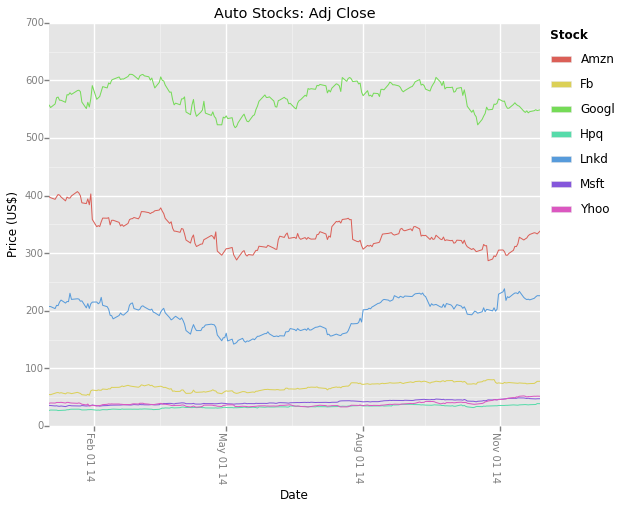

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from ggplot import *

stock_plot = ggplot(df_long, aes(x='Date', y='Price', color='Stock')) + \
        geom_line() + \
        ylab('Price (US$)') + \
        ggtitle('Auto Stocks: Adj Close') + \
        scale_x_date(labels='%b %d %y',breaks=date_breaks('3 months') )
    
# Have to use MATPLOTLIB api to rotate x tick labels.  Hopefully some day, ggplot will implement a rotation option.
fig = stock_plot.draw()
ax = fig.gca()
labels = ax.get_xticklabels() 
for label in labels: 
    label.set_rotation(270)
plt.show()

#### [ggplot](http://blog.yhathq.com/posts/ggplot-for-python.html) is AWESOME!

<a id='pivot'></a>

## How to convert data in long format to wide format using pd.pivot()

[[back to top](#top)]

In [21]:
pivoted = df_long.pivot(index='Date', columns='Stock', values='Price')
pivoted.head()

Stock,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
Date,,,,,,,
2014-01-02,397.97,54.71,557.12,27.17,207.64,35.91,39.59
2014-01-03,396.44,54.56,553.05,27.84,207.42,35.67,40.12
2014-01-06,393.63,57.20,559.22,27.79,203.92,34.92,39.93
2014-01-07,398.03,57.92,570.00,27.68,209.64,35.19,40.92
2014-01-08,401.92,58.23,571.19,26.96,209.06,34.56,41.02


<a id='category'></a>

## Using category data type to control sort order

[[back to top](#top)]

In [9]:
import pandas as pd
data = pd.DataFrame({'medal': ['bronze', 'silver', 'silver', 'gold','bronze', 'bronze', 'gold', 'gold','gold'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,medal,ounces
0,bronze,4.0
1,silver,3.0
2,silver,12.0
3,gold,6.0
4,bronze,7.5
5,bronze,8.0
6,gold,3.0
7,gold,5.0
8,gold,6.0


In [10]:
data["medal"] = data["medal"].astype("category")
data.dtypes

medal     category
ounces     float64
dtype: object

In [11]:
data.sort(columns=["medal"])

,medal,ounces
0,bronze,4.0
4,bronze,7.5
5,bronze,8.0
3,gold,6.0
6,gold,3.0
7,gold,5.0
8,gold,6.0
1,silver,3.0
2,silver,12.0


### Now define the order of the cetgorical data using set_categories()

[[back to top](#top)] [[back to section](#category)]

In [12]:
data["medal"].cat.set_categories([ "gold","silver","bronze"],inplace=True)

In [13]:
data.sort(columns=["medal"])

,medal,ounces
3,gold,6.0
6,gold,3.0
7,gold,5.0
8,gold,6.0
1,silver,3.0
2,silver,12.0
0,bronze,4.0
4,bronze,7.5
5,bronze,8.0


<a id='merge'></a>

### Merging 2 dataframes using merge()

[[back to top](#top)]

In [72]:
import pandas as pd
left = pd.DataFrame({'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
left

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [76]:
right = pd.DataFrame({'label': ['a','b','c'],
                     'value': ['alpha','beta','charlie']})
right

,label,value
0,a,alpha
1,b,beta
2,c,charlie


#### By default, merge() does an inner join, but you can specify 'left', 'right', or 'outer' joins

In [85]:
inner_joined = pd.merge(left, right, how='inner', left_on='group', right_on='label')
inner_joined

,group,ounces,label,value
0,a,4.0,a,alpha
1,a,3.0,a,alpha
2,a,12.0,a,alpha
3,b,6.0,b,beta
4,b,7.5,b,beta
5,b,8.0,b,beta
6,c,3.0,c,charlie
7,c,5.0,c,charlie
8,c,6.0,c,charlie


<a id="missing"></a>

### Finding rows of a dataframe containing missing data

[[back to top](#top)]

In [1]:
import numpy as np
import pandas as pd
df = pd.DataFrame([range(3), [0, np.NaN, 0], [0, 0, np.NaN], range(3), range(3)])
df

,0,1,2
0,0,1,2
1,0,NaN,0
2,0,0,NaN
3,0,1,2
4,0,1,2


In [2]:
df.isnull().any(axis=1)

0    False
1     True
2     True
3    False
4    False
dtype: bool

In [3]:
df[df.isnull().any(axis=1)]

,0,1,2
1,0,NaN,0
2,0,0,NaN


<a id='convert_type'></a>

### Converting a data type of a column in a dataframe

[[back to top](#top)]

In [10]:
import pandas as pd

a = [['a', '1.2', '4.2'], ['b', '70', '0.03'], ['x', '5', '0']]
df = pd.DataFrame(a, columns=['one', 'two', 'three'])
df

,one,two,three
0,a,1.2,4.2
1,b,70,0.03
2,x,5,0


In [13]:
df.dtypes

one      object
two      object
three    object
dtype: object

In [14]:
df[['two', 'three']] = df[['two', 'three']].astype(float)

In [15]:
df.dtypes

one       object
two      float64
three    float64
dtype: object

<a id='rpy2'></a>

### Sending Pandas dataframe to R using rpy2 IPython notebook extension

[[back to top](#top)]

Assuming you have [R](http://www.r-project.org/) and [rpy2](http://rpy.sourceforge.net/rpy2/doc-2.4/html/interactive.html#module-rpy2.ipython.rmagic) installed, we can send a Pandas dataframe to R using the rpy2 IPython extension to take advantage of R's various statistical and graphing packages.

#### Simple example where I will pull Yen currency exchange rate data from the web and graph it using R's ggplot2 library:

In [1]:
# load the rpy2 extension
%load_ext rpy2.ipython

#### Let's fetch the exchange rate data:

In [3]:
import pandas as pd

df = pd.read_csv('http://research.stlouisfed.org/fred2/data/EXJPUS.txt', sep='  ', skiprows=28, engine='python',
                 parse_dates=[0], header=None, names=['Month','Value'])

#### Sanity check on the data:

In [4]:
df.dtypes

Month    datetime64[ns]
Value           float64
dtype: object

In [6]:
df.tail()

,Month,Value
525,2014-10-01,108.0264
526,2014-11-01,116.2994
527,2014-12-01,119.3233
528,2015-01-01,118.2500
529,2015-02-01,118.4770


#### We'll use this one-liner %R magic command to send the Pandas dataframe to R as input using the "-i" flag.  See [here](http://rpy.sourceforge.net/rpy2/doc-2.4/html/interactive.html#module-rpy2.ipython.rmagic) for other flags.

In [9]:
%R -i df

#### Next, we'll use %%R magic command which will make the entire code cell R executable:

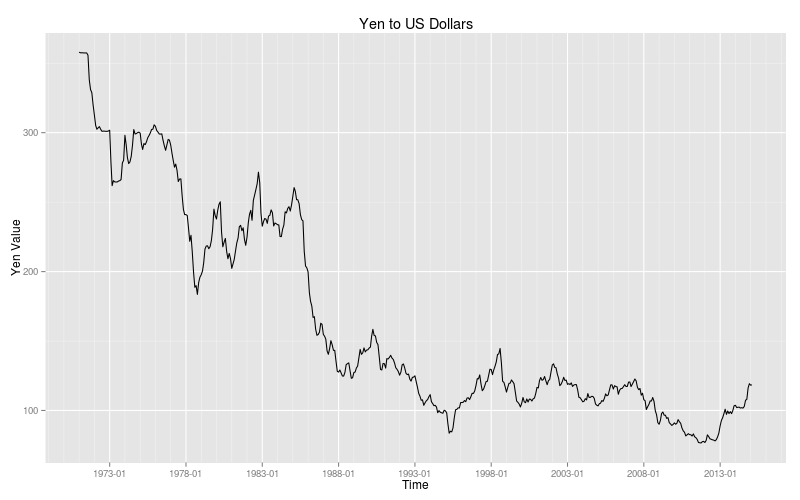

In [8]:
%%R -w 800 -h 500 -u px # instead of px, you can also choose 'in', 'cm', or 'mm'
df = as.data.frame(df)  # ensure dataframe that was passed in from Python will be R's dataframe type
library(ggplot2)        # plotting library
library(scales)         # enables us to change the x label time scale

p = ggplot(df, aes(df$Month, df$Value))
p = p + 
    geom_line() +
    scale_x_datetime(labels=date_format("%Y-%m"), breaks="5 years", minor_breaks="1 year") +
    ggtitle("Yen to US Dollars") +
    xlab("Time") +
    ylab("Yen Value")
print(p)

[[back to top](#top)]